Sky Kapoor and Chris Compierchio

This program will plot the hermite polynomials for several n values and compare the uncertainties of position and momentum of a particle

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from gaussxw import gaussxw

In [2]:
#Define n
n = range(4)
#Define x
x = np.linspace(-4,4, 100)

#Define the hermite function
def H(N, X):
    if N == 0:
        h1 = np.ones(X.shape)
    elif N == 1:
        h1 = 2*X
    elif N > 1:
        h0 = 1
        h1 = 2*X
        for q in range(1, N):
            h0, h1 = h1, 2*X*h1 - 2*q*h0
    return h1

#Define psi
def psi(N2, X2):
    part1 = 1/(np.sqrt((2**N2)*(math.factorial(N2))*np.sqrt(np.pi)))
    part2 = np.exp((-X2**2)/2)
    return part1*part2*H(N2,X2)

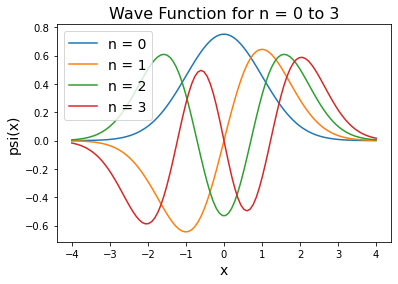

In [3]:
#Plot results
plt.plot(x, psi(n[0], x), label = "n = 0")
plt.plot(x, psi(n[1], x), label = "n = 1")
plt.plot(x, psi(n[2], x), label = "n = 2")
plt.plot(x, psi(n[3], x), label = "n = 3")

plt.title("Wave Function for n = 0 to 3", fontsize = 16)
plt.xlabel("x", fontsize = 14)
plt.ylabel("psi(x)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)

Text(0, 0.5, 'psi(x)')

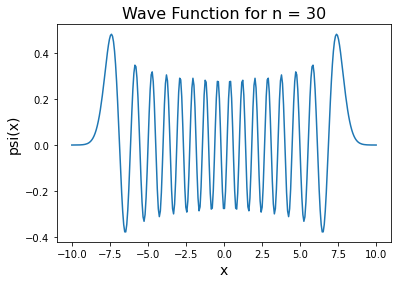

In [4]:
#Define a new range of x values
x2 = np.linspace(-10, 10, 300)

#plot results
plt.plot(x2, psi(30, x2), label = "n = 30")
plt.title("Wave Function for n = 30", fontsize = 16)
plt.xlabel("x", fontsize = 14)
plt.ylabel("psi(x)", fontsize = 14)

In [16]:
#define a new set of n values
n3 = range(16)

#Define position function
#def position(X3):
    #for k in n3:
        #p = (X3**2)*(np.abs(psi(n3[k], X3)))**2
        #return p

#Using Equation 5.74 and 5.75 from pg. 179 of the textbook, we can make 
#some substitutions to deal with the improper integrals in Python.
#We define the position function as follows:

def position(z):
    X3 = np.tan(z)
    positions = np.zeros(16)
    for k in n3:
        positions[k] = (X3**2)*np.abs(psi(n3[k], X3))**2 / np.cos(z)**2
    return positions

#Define momentum function using the same equations:
def momentum(p):
    for k in n3:
        return (p**2)*(np.abs(psi(n3[k],p)))**2
    
#Define energy function    
def energy(pos, mom):
    return 0.5*(pos+mom)

#define RMS for positions
def posRMS(pos):
    return np.sqrt(position(pos)**2)

#Define RMS for momentum
def momRMS(mom):
    return np.sqrt(momentum(mom)**2)

In [17]:
A = 100
#Define integral bounds using the change of variables in Newman
#Equation 5.74 and 5.75
a = -np.pi/2
b = np.pi/2

#Calculate the sample points and weights, then map them to the required
#integration domain for A
xgauss, w = gaussxw(A)
xp = 0.5*(b-a)*xgauss + 0.5*(b+a)
wp = 0.5*(b-a)*w

#Perform the Integration for A 

s = 0.0
t = 0.0
for j in range(A):
    s += 4*wp[j]*position(xp[j])
    t += posRMS(xp[j])
s, t

(array([ 2.        ,  6.        , 10.        , 14.        , 18.        ,
        22.        , 26.00000004, 30.00000035, 33.99999936, 37.99998556,
        41.99997421, 46.00024681, 50.00104771, 53.99862013, 57.98440731,
        61.98645898]),
 array([ 12.13686053,  39.20980233,  70.638332  , 104.86781102,
        141.34210955, 179.68108252, 219.64042562, 261.03508746,
        303.72546668, 347.59895856, 392.56452496, 438.54844254,
        485.48607299, 533.27820263, 581.80641505, 631.38528318]))